In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from teuk import HyperboloidalTeukolskySolver

In [4]:
import qnm
qnm.download_data()

Trying to fetch https://duetosymmetry.com/files/qnm/data-0.4.0.tar.bz2


data-0.4.0.tar.bz2: 94.6MB [01:09, 1.36MB/s]                              


Trying to decompress file /Users/zachnasipak/.qnm/data-0.4.0.tar.bz2
Data directory /Users/zachnasipak/.qnm/data contains 860 pickle files


In [3]:
hbl_gen = HyperboloidalTeukolskySolver()

In [8]:
import collocode
from mode import TeukolskyPointParticleModeGenerator, TeukolskyPointParticleModeGridGenerator
from hertz import HertzPointParticleModeGridGenerator
from teuk import sigma_r
from geo import MiniGeo
import numpy as np
import matplotlib.pyplot as plt

In [9]:
orbit = MiniGeo(0.9, 10., 0.2, 1)

In [10]:
solver = collocode.CollocationODEMultiDomainFixedStepSolver(n=32, chtype=1)
solver_kwargs = {"subdomains": 10, "tol": 1e-13, "spacing": 'arcsinh7'}
teuk_gen = TeukolskyPointParticleModeGenerator(orbit, solver, solver_kwargs)

In [11]:
foo = teuk_gen(-2, 4, 2, 0, 2)
spMin = sigma_r(orbit.radial_roots[0], foo.kappa)
spMax = sigma_r(orbit.radial_roots[1], foo.kappa)
rhor = np.linspace(1+foo.kappa+1e-5, 1+foo.kappa+0.3, 2000)
rinf = np.linspace(100, 1000, 2000)
shor = sigma_r(rhor, foo.kappa)
sinf = sigma_r(rinf, foo.kappa)

In [12]:
Rin=foo.radialsolution_tslicing("In", shor)
Rup=foo.radialsolution_tslicing("Up", sinf)

# Rin=foo.radialsolution("In", shor)
# Rup=foo.radialsolution("Up", sinf)

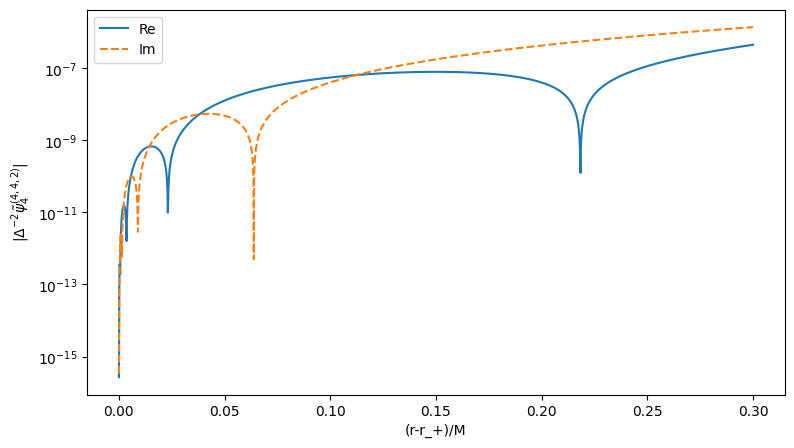

In [13]:
plt.rcParams["figure.figsize"] = (9,5)
deltaHor = rhor**2 - 2*rhor + foo.a**2
plt.plot(rhor - (1+foo.kappa), np.abs(Rin.real), label = "Re")
plt.plot(rhor - (1+foo.kappa), np.abs(Rin.imag), '--', label = "Im")
plt.yscale('log')
plt.xlabel("(r-r_+)/M")
plt.ylabel("$|\Delta^{-2}\\tilde{\psi}^{(4,4,2)}_4|$")
plt.legend()

Text(0, 0.5, '$|r\\tilde{\\psi}^{(4,4,2)}_4|$')

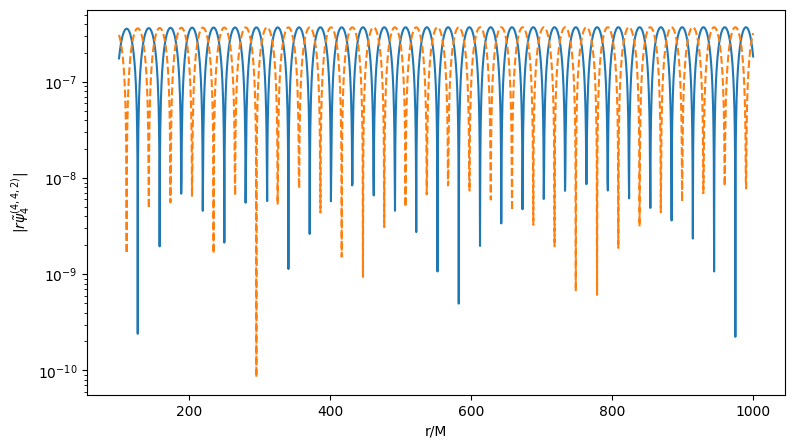

In [14]:
plt.rcParams["figure.figsize"] = (9,5)
plt.plot(rinf, np.abs(Rup.real)/rinf**3, label = 'Re')
plt.plot(rinf, np.abs(Rup.imag)/rinf**3, '--', label = 'Im')
plt.yscale('log')
plt.xlabel("r/M")
plt.ylabel("$|r\\tilde{\psi}^{(4,4,2)}_4|$")
# plt.legend()

In [15]:
spMin = sigma_r(orbit.radial_roots[0], foo.kappa)
spMax = sigma_r(orbit.radial_roots[1], foo.kappa)
shorALL = np.linspace(spMin, 1, 1000)
sinfALL = np.linspace(0, spMax, 1000)
RinALL=foo.radialsolution("In", shorALL)
RupALL=foo.radialsolution("Up", sinfALL)

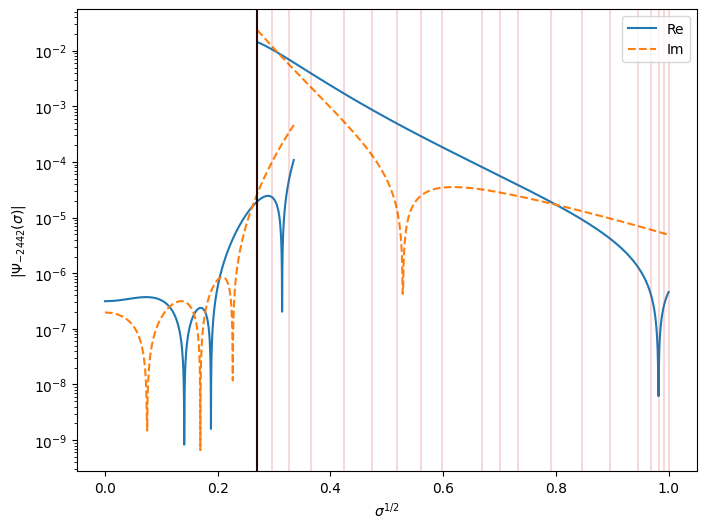

In [16]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(sinfALL**(0.5), np.abs(RupALL.real), color = 'C0', label = 'Re')
plt.plot(sinfALL**(0.5), np.abs(RupALL.imag), '--', color = 'C1', label = 'Im')
plt.plot(shorALL**(0.5), np.abs(RinALL.real), color = 'C0')
plt.plot(shorALL**(0.5), np.abs(RinALL.imag), '--', color = 'C1')
plt.axvline(x = spMin**(0.5), color = 'black')
# plt.axvline(x = spMax**(0.5), color = 'black')
for sig in foo.Rslm.domains["In"]:
    plt.axvline(x = sig**(0.5), color = 'C3', lw = 0.25)
plt.yscale('log')
plt.xlabel("$\sigma^{1/2}$")
plt.ylabel("$|{\Psi}_{-2442}(\sigma)|$")
plt.legend(loc="upper right")